In [1]:
import pandas as pd
import numpy as np
import requests
import json
import tweepy
import os

# Gathering data

In [2]:
## Loading a local file
tw_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
## Downlading a file that is hosted in Udacity's server using URL and Requests Library
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

## Saving the file as 'image-predictions.tsv'
with open(os.path.join(folder_name,url.split('/')[-1]), mode='wb') as file:
    file.write(r.content)

## Open tsv file
image_predictions_df = pd.read_csv('image_pred.tsv', sep='\t')

In [4]:
## Twitter consumer keys and access tokens for authentication process to use Tweepy API
consumer_key = 'XXXXXXXXXX'
consumer_secret = 'XXXXXXXX'
access_token = 'XXXXXXX'
access_secret = 'XXXXXXX'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)

In [5]:
## Query tweets using tweet_id from the archive_df
tweet_ids = list(tw_archive_df.tweet_id)
tweet_data = {}

for tweet in tweet_ids:
    try:
        tweet_status = api.get_status(tweet, tweet_mode = 'extended',
                                      wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
        tweet_data[str(tweet)] = tweet_status._json
    except:
        print("Error for: " + str(tweet))

Error for: 888202515573088257
Error for: 873697596434513921
Error for: 872668790621863937
Error for: 872261713294495745
Error for: 869988702071779329
Error for: 866816280283807744
Error for: 861769973181624320
Error for: 856602993587888130
Error for: 845459076796616705
Error for: 844704788403113984
Error for: 842892208864923648
Error for: 837012587749474308
Error for: 827228250799742977
Error for: 812747805718642688
Error for: 802247111496568832
Error for: 775096608509886464
Error for: 770743923962707968
Rate limit reached. Sleeping for: 708
Error for: 754011816964026368
Error for: 680055455951884288
Rate limit reached. Sleeping for: 707


In [6]:
## read and load JSON file

with open ('tweet_json.txt', 'w') as file:
    json.dump(tweet_data, file)

In [7]:
with open('tweet_json.txt') as file:
    data = json.load(file)

## For loop to append each tweet into a list   
    
df_list = []

for tweet_id in data.keys():
    retweets = data[tweet_id]['retweet_count']
    favorites = data[tweet_id]['favorite_count']
    df_list.append({"tweet_id":tweet_id,
                      "retweets":retweets,
                      "favorites":favorites})
    
tweets_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweets', 'favorites'])
tweets_df.sample()

,tweet_id,retweets,favorites
2016,671735591348891648,761,1450


## Assessing Data

Three dataframes:

1) tw_archive_df or df_clean contains each tweet's text, rating, and category
2) image_predictions_df or image_clean has results of a netural networks identifying dog's breed
3) tweets_df or tweets_clean has tweet_id, # of retweets, and # of favorites

In [143]:
### Making a copy of each dataset
df_clean = tw_archive_df.copy()
image_clean = image_predictions_df.copy()
tweets_clean = tweets_df.copy()

In [144]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [145]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [146]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 3 columns):
tweet_id     2337 non-null object
retweets     2337 non-null int64
favorites    2337 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.9+ KB


In [147]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [148]:
image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [149]:
tweets_clean.head()

,tweet_id,retweets,favorites
0,892420643555336193,8169,37485
1,892177421306343426,6047,32230
2,891815181378084864,4001,24282
3,891689557279858688,8324,40823
4,891327558926688256,9016,39031


### Quality Issues

1. Convert tweet_id to 'string'
2. "tw_archive_df" has 181 retweets and 78 replies which may not needed in our analysis
3. Convert timestamp to 'datetime' data type
4. Fix incorrect dog names in names column
5. Remove unnecessary number (+0000) from timestamp
6. simplify source text
7. Drop rows with no images ("tw_archive_df" has 2356 rows while the "image_predictions_df" has only 2075 rows. The image predictions do not contain photos beyond August 1st, 2017.)
8. Convert source and dog_type columns to 'category' datatype


### Tidiness Issues

1. three dataframes exist, only one dataframe should be enough for this project
2. there are three breed prediction columns - having one column with most confident prediction will sufficient
3. there are three dog stage columns - they should be melted into one column

# Cleaning

In [150]:
# Save a copy of the clean datasets to work with

df_clean.to_csv('df_clean.csv',encoding='utf-8',index=False)
image_clean.to_csv('image_clean.csv',encoding='utf-8',index=False)
tweets_clean.to_csv('tweets_clean.csv',encoding='utf-8',index=False)

In [151]:
# Load datasets
df_clean = pd.read_csv('df_clean.csv')
image_clean = pd.read_csv('image_clean.csv')
tweets_clean = pd.read_csv('tweets_clean.csv')

## 1) Conver tweet_id to str and combine three dataframes into one master dataframe using merge

In [152]:
df_clean.tweet_id = df_clean.tweet_id.astype(str)
image_clean.tweet_id = image_clean.tweet_id.astype(str)
tweets_clean.tweet_id = tweets_clean.tweet_id.astype(str)

In [153]:
df_master = pd.merge(df_clean,tweets_clean, on = 'tweet_id', how = 'inner')

In [154]:
df_master = pd.merge(df_master, image_clean, on = 'tweet_id', how = 'inner')

In [155]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2065 entries, 0 to 2064
Data columns (total 30 columns):
tweet_id                      2065 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2065 non-null object
source                        2065 non-null object
text                          2065 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2065 non-null object
rating_numerator              2065 non-null int64
rating_denominator            2065 non-null int64
name                          2065 non-null object
doggo                         2065 non-null object
floofer                       2065 non-null object
pupper                        2065 non-null object
puppo                         2065 non-null object
retweets                      2065

## 2) Remove retweets and replies

In [156]:
df_master.in_reply_to_status_id.value_counts()

6.671522e+17    2
8.558181e+17    1
6.753494e+17    1
6.747934e+17    1
6.747522e+17    1
7.468859e+17    1
6.706684e+17    1
6.844811e+17    1
6.749998e+17    1
6.842229e+17    1
7.291135e+17    1
6.754971e+17    1
6.717299e+17    1
7.590995e+17    1
6.914169e+17    1
6.920419e+17    1
6.715610e+17    1
7.030419e+17    1
6.757073e+17    1
7.032559e+17    1
6.678065e+17    1
7.331095e+17    1
Name: in_reply_to_status_id, dtype: int64

In [157]:
## 75 retweets are not needed. Keep the rows that are null and remove the retweets

df_master = df_master[df_master.retweeted_status_id.isnull()]

In [158]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990 entries, 0 to 2064
Data columns (total 30 columns):
tweet_id                      1990 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1990 non-null object
source                        1990 non-null object
text                          1990 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1990 non-null object
rating_numerator              1990 non-null int64
rating_denominator            1990 non-null int64
name                          1990 non-null object
doggo                         1990 non-null object
floofer                       1990 non-null object
pupper                        1990 non-null object
puppo                         1990 non-null object
retweets                      1990 no

In [159]:
df_master = df_master.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis = 1)

In [160]:
## removing replies

df_master = df_master[df_master.in_reply_to_status_id.isnull()]
df_master = df_master.drop(['in_reply_to_status_id','in_reply_to_user_id'], axis = 1)

In [161]:
df_master.head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweets,favorites,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,8169,37485,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,6047,32230,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,4001,24282,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,8324,40823,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,9016,39031,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,2994,19619,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,1984,11459,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None,18146,63224,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,4110,26968,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,7100,30915,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


In [162]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 2064
Data columns (total 25 columns):
tweet_id              1967 non-null object
timestamp             1967 non-null object
source                1967 non-null object
text                  1967 non-null object
expanded_urls         1967 non-null object
rating_numerator      1967 non-null int64
rating_denominator    1967 non-null int64
name                  1967 non-null object
doggo                 1967 non-null object
floofer               1967 non-null object
pupper                1967 non-null object
puppo                 1967 non-null object
retweets              1967 non-null int64
favorites             1967 non-null int64
jpg_url               1967 non-null object
img_num               1967 non-null int64
p1                    1967 non-null object
p1_conf               1967 non-null float64
p1_dog                1967 non-null bool
p2                    1967 non-null object
p2_conf               1967 non-null flo

## 3) Melt the four dog type columns into one dog type column

In [163]:
### Melt the four columns into 'types' (to be dropped) and 'dog_type' (value column to be kept)

df_master = pd.melt(df_master, id_vars = ['tweet_id', 
                                 'timestamp', 'source', 'text', 
                                 'expanded_urls', 'rating_numerator', 'rating_denominator',
                                 'name', 'retweets', 'favorites', 'jpg_url', 'img_num', 'p1',
                                 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
                                 'p3_dog'], value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], 
                                  var_name = 'types', value_name = 'dog_type')

In [164]:
df_master.dog_type.value_counts()

None       7555
pupper      209
doggo        73
puppo        23
floofer       8
Name: dog_type, dtype: int64

In [165]:
df_master = df_master.drop('types', axis=1)

In [166]:
df_master = df_master.sort_values('dog_type').drop_duplicates('tweet_id', keep = 'last')

In [167]:
df_master.dog_type.value_counts()

None       1664
pupper      209
doggo        63
puppo        23
floofer       8
Name: dog_type, dtype: int64

In [168]:
df_master

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweets,favorites,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type
1891,667405339315146752,2015-11-19 18:13:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,220,460,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,1,Saint_Bernard,0.381377,True,Leonberg,0.127998,True,golden_retriever,0.069357,True,None
1890,667435689202614272,2015-11-19 20:14:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12,10,None,83,303,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,1,Rottweiler,0.999091,True,miniature_pinscher,0.000450,True,black-and-tan_coonhound,0.000157,True,None
1889,667437278097252352,2015-11-19 20:20:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,10,10,None,235,445,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,1,porcupine,0.989154,False,bath_towel,0.006300,False,badger,0.000966,False,None
1888,667443425659232256,2015-11-19 20:44:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6,10,None,574,772,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,1,goose,0.980815,False,drake,0.006918,False,hen,0.005255,False,None
1887,667453023279554560,2015-11-19 21:22:56 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11,10,Cupcake,89,306,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,1,Labrador_retriever,0.825670,True,French_bulldog,0.056639,True,Staffordshire_bullterrier,0.054018,True,None
1886,667455448082227200,2015-11-19 21:32:34 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Reese and Twips. Reese protects Twips....,https://twitter.com/dog_rates/status/667455448...,7,10,Reese,59,189,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,1,Tibetan_terrier,0.676376,True,Irish_terrier,0.054933,True,Yorkshire_terrier,0.040576,True,None
1885,667470559035432960,2015-11-19 22:32:36 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a northern Wahoo named Kohl. He runs t...,https://twitter.com/dog_rates/status/667470559...,11,10,a,99,252,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,1,toy_poodle,0.304175,True,pug,0.223427,True,Lakeland_terrier,0.073316,True,None
1884,667491009379606528,2015-11-19 23:53:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Two dogs in this one. Both are rare Jujitsu Py...,https://twitter.com/dog_rates/status/667491009...,7,10,None,224,528,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,1,borzoi,0.852088,True,ice_bear,0.132264,False,weasel,0.005730,False,None
1883,667495797102141441,2015-11-20 00:12:54 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Philippe from Soviet Russia. Commandin...,https://twitter.com/dog_rates/status/667495797...,9,10,Philippe,270,514,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,1,Chihuahua,0.143957,True,Christmas_stocking,0.118651,False,ski_mask,0.092482,False,None
1882,667502640335572993,2015-11-20 00:40:05 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Say hello to Hall and Oates. Oates is winking ...,https://twitter.com/dog_rates/status/667502640...,11,10,Hall,219,529,https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg,1,Labrador_retriever,0.996709,True,golden_retriever,0.001688,True,beagle,0.000712,True,None


In [169]:
df_master.dog_type.value_counts()

None       1664
pupper      209
doggo        63
puppo        23
floofer       8
Name: dog_type, dtype: int64

## 4) Iterate through prediction columns to find the most likely breed for each row

In [188]:
breed = []
confidence = []

# Create a function to interate through predction columns to find the most likely breed
def breed_pred(df):
    if df['p1_dog'] == True:
        breed.append(df['p1'])
        confidence.append(df['p1_conf'])
    elif df['p2_dog'] == True:
        breed.append(df['p2'])
        confidence.append(df['p2_conf'])
    elif df['p3_dog'] == True:
        breed.append(df['p3'])
        confidence.append(df['p3_conf'])
    else:
        breed.append('Unknown')
        confidence.append(0)
        
df_master.apply(breed_pred, axis=1)

df_master['breed'] = breed
df_master['confidence'] = confidence

In [189]:
# drop prediction columns

df_master = df_master.drop(['p1','p1_dog','p1_conf','p2','p2_dog','p2_conf','p3','p3_dog','p3_conf'], axis=1)

In [190]:
df_master.head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweets,favorites,jpg_url,img_num,dog_type,breed,confidence
1891,667405339315146752,2015-11-19 18:13:27,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,220,460,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,1,None,Saint_Bernard,0.381377
1890,667435689202614272,2015-11-19 20:14:03,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12,10,None,83,303,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,1,None,Rottweiler,0.999091
1889,667437278097252352,2015-11-19 20:20:22,Twitter for iPhone,Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,10,10,None,235,445,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,1,None,Unknown,0.000000
1888,667443425659232256,2015-11-19 20:44:47,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6,10,None,574,772,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,1,None,Unknown,0.000000
1887,667453023279554560,2015-11-19 21:22:56,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11,10,Cupcake,89,306,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,1,None,Labrador_retriever,0.825670
1886,667455448082227200,2015-11-19 21:32:34,Twitter Web Client,This is Reese and Twips. Reese protects Twips....,https://twitter.com/dog_rates/status/667455448...,7,10,Reese,59,189,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,1,None,Tibetan_terrier,0.676376
1885,667470559035432960,2015-11-19 22:32:36,Twitter Web Client,This is a northern Wahoo named Kohl. He runs t...,https://twitter.com/dog_rates/status/667470559...,11,10,None,99,252,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,1,None,toy_poodle,0.304175
1884,667491009379606528,2015-11-19 23:53:52,Twitter Web Client,Two dogs in this one. Both are rare Jujitsu Py...,https://twitter.com/dog_rates/status/667491009...,7,10,None,224,528,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,1,None,borzoi,0.852088
1883,667495797102141441,2015-11-20 00:12:54,Twitter Web Client,This is Philippe from Soviet Russia. Commandin...,https://twitter.com/dog_rates/status/667495797...,9,10,Philippe,270,514,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,1,None,Chihuahua,0.143957
1882,667502640335572993,2015-11-20 00:40:05,Twitter Web Client,Say hello to Hall and Oates. Oates is winking ...,https://twitter.com/dog_rates/status/667502640...,11,10,Hall,219,529,https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg,1,None,Labrador_retriever,0.996709


In [191]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 1891 to 6663
Data columns (total 15 columns):
tweet_id              1967 non-null object
timestamp             1967 non-null datetime64[ns]
source                1967 non-null category
text                  1967 non-null object
expanded_urls         1967 non-null object
rating_numerator      1967 non-null int64
rating_denominator    1967 non-null int64
name                  1967 non-null object
retweets              1967 non-null int64
favorites             1967 non-null int64
jpg_url               1967 non-null object
img_num               1967 non-null int64
dog_type              1967 non-null category
breed                 1967 non-null object
confidence            1967 non-null float64
dtypes: category(2), datetime64[ns](1), float64(1), int64(5), object(6)
memory usage: 219.3+ KB


## 5) Fix incorrect dog names in names column

In [192]:
df_master.head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweets,favorites,jpg_url,img_num,dog_type,breed,confidence
1891,667405339315146752,2015-11-19 18:13:27,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,220,460,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,1,None,Saint_Bernard,0.381377
1890,667435689202614272,2015-11-19 20:14:03,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12,10,None,83,303,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,1,None,Rottweiler,0.999091
1889,667437278097252352,2015-11-19 20:20:22,Twitter for iPhone,Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,10,10,None,235,445,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,1,None,Unknown,0.000000
1888,667443425659232256,2015-11-19 20:44:47,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6,10,None,574,772,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,1,None,Unknown,0.000000
1887,667453023279554560,2015-11-19 21:22:56,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11,10,Cupcake,89,306,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,1,None,Labrador_retriever,0.825670
1886,667455448082227200,2015-11-19 21:32:34,Twitter Web Client,This is Reese and Twips. Reese protects Twips....,https://twitter.com/dog_rates/status/667455448...,7,10,Reese,59,189,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,1,None,Tibetan_terrier,0.676376
1885,667470559035432960,2015-11-19 22:32:36,Twitter Web Client,This is a northern Wahoo named Kohl. He runs t...,https://twitter.com/dog_rates/status/667470559...,11,10,None,99,252,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,1,None,toy_poodle,0.304175
1884,667491009379606528,2015-11-19 23:53:52,Twitter Web Client,Two dogs in this one. Both are rare Jujitsu Py...,https://twitter.com/dog_rates/status/667491009...,7,10,None,224,528,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,1,None,borzoi,0.852088
1883,667495797102141441,2015-11-20 00:12:54,Twitter Web Client,This is Philippe from Soviet Russia. Commandin...,https://twitter.com/dog_rates/status/667495797...,9,10,Philippe,270,514,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,1,None,Chihuahua,0.143957
1882,667502640335572993,2015-11-20 00:40:05,Twitter Web Client,Say hello to Hall and Oates. Oates is winking ...,https://twitter.com/dog_rates/status/667502640...,11,10,Hall,219,529,https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg,1,None,Labrador_retriever,0.996709


In [172]:
df_master.name.value_counts()

None         524
a             55
Charlie       10
Cooper        10
Oliver        10
Lucy          10
Tucker         9
Penny          9
Winston        8
Sadie          8
Lola           7
Toby           7
Daisy          7
the            7
Bella          6
an             6
Bo             6
Jax            6
Koda           6
Stanley        6
Buddy          5
Louis          5
Dave           5
Bailey         5
Scout          5
Chester        5
Milo           5
Rusty          5
Oscar          5
Leo            5
            ... 
Milky          1
Lambeau        1
Eve            1
Hanz           1
Tebow          1
Marq           1
Carll          1
Bradlay        1
Moofasa        1
Philippe       1
Amélie         1
Crumpet        1
Adele          1
Mya            1
Kathmandu      1
Stormy         1
Reagan         1
Tove           1
Zoe            1
Dex            1
Trigger        1
Bruiser        1
Baloo          1
Clarq          1
Gidget         1
Finnegus       1
Blakely        1
Hector        

In [173]:
# If name starts with a lowercase, subsitutue 'None'

dog_names = []

# Write a function to iterate through name column to identify any incorrect name, change to 'None', and append to dog_name
def dog_name (df):
    if df['name'][0].islower() == True:
        dog_names.append('None')
    else:
        dog_names.append(df['name'])
        
df_master.apply(dog_name, axis = 1)

df_master['name'] = dog_names

In [174]:
df_master.head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweets,favorites,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type
1891,667405339315146752,2015-11-19 18:13:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,220,460,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,1,Saint_Bernard,0.381377,True,Leonberg,0.127998,True,golden_retriever,0.069357,True,None
1890,667435689202614272,2015-11-19 20:14:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12,10,None,83,303,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,1,Rottweiler,0.999091,True,miniature_pinscher,0.000450,True,black-and-tan_coonhound,0.000157,True,None
1889,667437278097252352,2015-11-19 20:20:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,10,10,None,235,445,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,1,porcupine,0.989154,False,bath_towel,0.006300,False,badger,0.000966,False,None
1888,667443425659232256,2015-11-19 20:44:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6,10,None,574,772,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,1,goose,0.980815,False,drake,0.006918,False,hen,0.005255,False,None
1887,667453023279554560,2015-11-19 21:22:56 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11,10,Cupcake,89,306,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,1,Labrador_retriever,0.825670,True,French_bulldog,0.056639,True,Staffordshire_bullterrier,0.054018,True,None
1886,667455448082227200,2015-11-19 21:32:34 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Reese and Twips. Reese protects Twips....,https://twitter.com/dog_rates/status/667455448...,7,10,Reese,59,189,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,1,Tibetan_terrier,0.676376,True,Irish_terrier,0.054933,True,Yorkshire_terrier,0.040576,True,None
1885,667470559035432960,2015-11-19 22:32:36 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a northern Wahoo named Kohl. He runs t...,https://twitter.com/dog_rates/status/667470559...,11,10,None,99,252,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,1,toy_poodle,0.304175,True,pug,0.223427,True,Lakeland_terrier,0.073316,True,None
1884,667491009379606528,2015-11-19 23:53:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Two dogs in this one. Both are rare Jujitsu Py...,https://twitter.com/dog_rates/status/667491009...,7,10,None,224,528,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,1,borzoi,0.852088,True,ice_bear,0.132264,False,weasel,0.005730,False,None
1883,667495797102141441,2015-11-20 00:12:54 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Philippe from Soviet Russia. Commandin...,https://twitter.com/dog_rates/status/667495797...,9,10,Philippe,270,514,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,1,Chihuahua,0.143957,True,Christmas_stocking,0.118651,False,ski_mask,0.092482,False,None
1882,667502640335572993,2015-11-20 00:40:05 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Say hello to Hall and Oates. Oates is winking ...,https://twitter.com/dog_rates/status/667502640...,11,10,Hall,219,529,https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg,1,Labrador_retriever,0.996709,True,golden_retriever,0.001688,True,beagle,0.000712,True,None


In [175]:
list(df_master['name'])

['Biden',
 'None',
 'None',
 'None',
 'Cupcake',
 'Reese',
 'None',
 'None',
 'Philippe',
 'Hall',
 'None',
 'Dook',
 'Fwed',
 'None',
 'Frank',
 'None',
 'Kial',
 'George',
 'None',
 'None',
 'Olive',
 'Calvin',
 'None',
 'None',
 'None',
 'None',
 'Naphaniel',
 'None',
 'Genevieve',
 'Joshwa',
 'None',
 'None',
 'Jockson',
 'Jeph',
 'None',
 'None',
 'None',
 'None',
 'Carll',
 'Klevin',
 'None',
 'Keet',
 'None',
 'Dave',
 'Clybe',
 'Gabe',
 'None',
 'Pipsy',
 'Bradlay',
 'Churlie',
 'Kenneth',
 'Clarence',
 'None',
 'None',
 'Timison',
 'None',
 'None',
 'Filup',
 'None',
 'None',
 'Shaggy',
 'Josep',
 'None',
 'Tedrick',
 'Stu',
 'Erik',
 'Cleopatricia',
 'None',
 'Otis',
 'Jiminy',
 'None',
 'Alfie',
 'None',
 'None',
 'Lugan',
 'None',
 'Christoper',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'Walter',
 'None',
 'None',
 'None',
 'None',
 'None',
 'Scout',
 'Kr

In [176]:
df_master.name.value_counts()

None         622
Charlie       10
Oliver        10
Cooper        10
Lucy          10
Tucker         9
Penny          9
Winston        8
Sadie          8
Lola           7
Toby           7
Daisy          7
Jax            6
Koda           6
Stanley        6
Bo             6
Bella          6
Bailey         5
Chester        5
Leo            5
Louis          5
Rusty          5
Buddy          5
Oscar          5
Dave           5
Scout          5
Milo           5
Maggie         4
Jack           4
Larry          4
            ... 
Rupert         1
Gordon         1
Hanz           1
Tebow          1
Creg           1
Spanky         1
Happy          1
Crumpet        1
Bruiser        1
Adele          1
Mya            1
Kathmandu      1
Stormy         1
Reagan         1
Tove           1
Moofasa        1
Zoe            1
Trigger        1
Baloo          1
Marq           1
Clarq          1
Gidget         1
Finnegus       1
Blakely        1
Hector         1
Gòrdón         1
Dex            1
Bradlay       

## 6) simplify source data

In [177]:
import re

In [178]:
list(df_master['source'])

['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>

In [181]:
df_master['source'] = df_master.source.apply(lambda x: re.findall(r'>(.*)<',x)[0])

In [182]:
df_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweets,favorites,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type
1891,667405339315146752,2015-11-19 18:13:27 +0000,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,220,460,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,1,Saint_Bernard,0.381377,True,Leonberg,0.127998,True,golden_retriever,0.069357,True,None
1890,667435689202614272,2015-11-19 20:14:03 +0000,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12,10,None,83,303,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,1,Rottweiler,0.999091,True,miniature_pinscher,0.000450,True,black-and-tan_coonhound,0.000157,True,None
1889,667437278097252352,2015-11-19 20:20:22 +0000,Twitter for iPhone,Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,10,10,None,235,445,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,1,porcupine,0.989154,False,bath_towel,0.006300,False,badger,0.000966,False,None
1888,667443425659232256,2015-11-19 20:44:47 +0000,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6,10,None,574,772,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,1,goose,0.980815,False,drake,0.006918,False,hen,0.005255,False,None
1887,667453023279554560,2015-11-19 21:22:56 +0000,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11,10,Cupcake,89,306,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,1,Labrador_retriever,0.825670,True,French_bulldog,0.056639,True,Staffordshire_bullterrier,0.054018,True,None


## 7) Remove unnecessary numbers from timestamp

In [183]:
df_master['timestamp'] = df_master['timestamp'].str.strip('+0000')

In [184]:
df_master.head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweets,favorites,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type
1891,667405339315146752,2015-11-19 18:13:27,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,220,460,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,1,Saint_Bernard,0.381377,True,Leonberg,0.127998,True,golden_retriever,0.069357,True,None
1890,667435689202614272,2015-11-19 20:14:03,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12,10,None,83,303,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,1,Rottweiler,0.999091,True,miniature_pinscher,0.000450,True,black-and-tan_coonhound,0.000157,True,None
1889,667437278097252352,2015-11-19 20:20:22,Twitter for iPhone,Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,10,10,None,235,445,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,1,porcupine,0.989154,False,bath_towel,0.006300,False,badger,0.000966,False,None
1888,667443425659232256,2015-11-19 20:44:47,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6,10,None,574,772,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,1,goose,0.980815,False,drake,0.006918,False,hen,0.005255,False,None
1887,667453023279554560,2015-11-19 21:22:56,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11,10,Cupcake,89,306,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,1,Labrador_retriever,0.825670,True,French_bulldog,0.056639,True,Staffordshire_bullterrier,0.054018,True,None
1886,667455448082227200,2015-11-19 21:32:34,Twitter Web Client,This is Reese and Twips. Reese protects Twips....,https://twitter.com/dog_rates/status/667455448...,7,10,Reese,59,189,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,1,Tibetan_terrier,0.676376,True,Irish_terrier,0.054933,True,Yorkshire_terrier,0.040576,True,None
1885,667470559035432960,2015-11-19 22:32:36,Twitter Web Client,This is a northern Wahoo named Kohl. He runs t...,https://twitter.com/dog_rates/status/667470559...,11,10,None,99,252,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,1,toy_poodle,0.304175,True,pug,0.223427,True,Lakeland_terrier,0.073316,True,None
1884,667491009379606528,2015-11-19 23:53:52,Twitter Web Client,Two dogs in this one. Both are rare Jujitsu Py...,https://twitter.com/dog_rates/status/667491009...,7,10,None,224,528,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,1,borzoi,0.852088,True,ice_bear,0.132264,False,weasel,0.005730,False,None
1883,667495797102141441,2015-11-20 00:12:54,Twitter Web Client,This is Philippe from Soviet Russia. Commandin...,https://twitter.com/dog_rates/status/667495797...,9,10,Philippe,270,514,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,1,Chihuahua,0.143957,True,Christmas_stocking,0.118651,False,ski_mask,0.092482,False,None
1882,667502640335572993,2015-11-20 00:40:05,Twitter Web Client,Say hello to Hall and Oates. Oates is winking ...,https://twitter.com/dog_rates/status/667502640...,11,10,Hall,219,529,https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg,1,Labrador_retriever,0.996709,True,golden_retriever,0.001688,True,beagle,0.000712,True,None


In [185]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 1891 to 6663
Data columns (total 22 columns):
tweet_id              1967 non-null object
timestamp             1967 non-null object
source                1967 non-null object
text                  1967 non-null object
expanded_urls         1967 non-null object
rating_numerator      1967 non-null int64
rating_denominator    1967 non-null int64
name                  1967 non-null object
retweets              1967 non-null int64
favorites             1967 non-null int64
jpg_url               1967 non-null object
img_num               1967 non-null int64
p1                    1967 non-null object
p1_conf               1967 non-null float64
p1_dog                1967 non-null bool
p2                    1967 non-null object
p2_conf               1967 non-null float64
p2_dog                1967 non-null bool
p3                    1967 non-null object
p3_conf               1967 non-null float64
p3_dog                1967 non-null 

## 8) Appropriate datatype

In [193]:
df_master['timestamp'] = pd.to_datetime(df_master.timestamp)
df_master['source'] = df_master['source'].astype('category')
df_master['dog_type'] = df_master['dog_type'].astype('category')
df_master['confidence'] = df_master['confidence'].round(1)

In [194]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 1891 to 6663
Data columns (total 15 columns):
tweet_id              1967 non-null object
timestamp             1967 non-null datetime64[ns]
source                1967 non-null category
text                  1967 non-null object
expanded_urls         1967 non-null object
rating_numerator      1967 non-null int64
rating_denominator    1967 non-null int64
name                  1967 non-null object
retweets              1967 non-null int64
favorites             1967 non-null int64
jpg_url               1967 non-null object
img_num               1967 non-null int64
dog_type              1967 non-null category
breed                 1967 non-null object
confidence            1967 non-null float64
dtypes: category(2), datetime64[ns](1), float64(1), int64(5), object(6)
memory usage: 219.3+ KB


In [195]:
df_master.to_csv('twitter_archive_master.csv', encoding = 'utf-8', index = False)
df_clean = pd.read_csv('twitter_archive_master.csv')

## Analysis

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid')

In [197]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 1891 to 6663
Data columns (total 15 columns):
tweet_id              1967 non-null object
timestamp             1967 non-null datetime64[ns]
source                1967 non-null category
text                  1967 non-null object
expanded_urls         1967 non-null object
rating_numerator      1967 non-null int64
rating_denominator    1967 non-null int64
name                  1967 non-null object
retweets              1967 non-null int64
favorites             1967 non-null int64
jpg_url               1967 non-null object
img_num               1967 non-null int64
dog_type              1967 non-null category
breed                 1967 non-null object
confidence            1967 non-null float64
dtypes: category(2), datetime64[ns](1), float64(1), int64(5), object(6)
memory usage: 219.3+ KB


In [198]:
df_clean.breed.value_counts().nlargest(5)

Unknown               305
golden_retriever      156
Labrador_retriever    104
Pembroke               94
Chihuahua              90
Name: breed, dtype: int64

In [199]:
df_clean.loc[df_clean['breed'] == 'Unknown'] = None

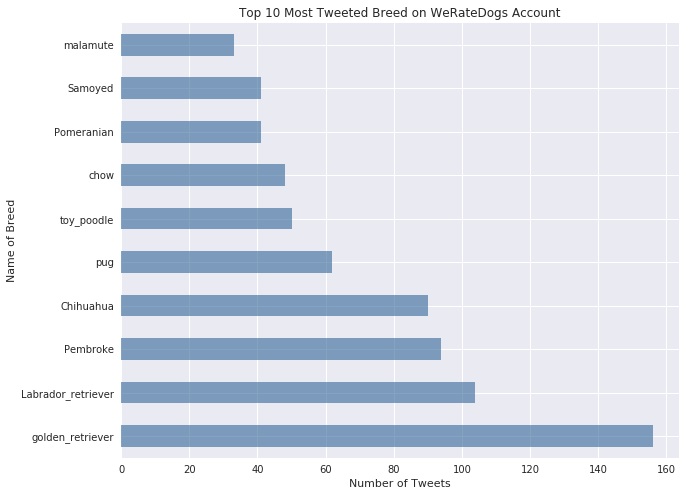

In [200]:
fig_size = plt.figure(figsize=(10,8))
df_clean.groupby(['breed']).count()['tweet_id'].sort_values(ascending = False).nlargest(10).plot(kind='barh', color=(0.2, 0.4, 0.6, 0.6))
plt.title('Top 10 Most Tweeted Breed on WeRateDogs Account')
plt.xlabel('Number of Tweets')
plt.ylabel('Name of Breed');

In [201]:
round(df_clean.groupby('breed')['favorites'].sum() / df_clean.groupby('breed')['favorites'].count(),0).sort_values(ascending=False)

breed
Bedlington_terrier             23819.0
Saluki                         22935.0
French_bulldog                 19367.0
Bouvier_des_Flandres           17038.0
Afghan_hound                   16322.0
black-and-tan_coonhound        16159.0
flat-coated_retriever          15966.0
Irish_water_spaniel            15501.0
Leonberg                       14094.0
whippet                        13923.0
English_springer               13422.0
standard_poodle                13221.0
cocker_spaniel                 13082.0
Samoyed                        13041.0
Mexican_hairless               12879.0
Border_terrier                 12874.0
Eskimo_dog                     12308.0
Cardigan                       12138.0
Lakeland_terrier               12026.0
golden_retriever               11962.0
Great_Pyrenees                 11730.0
Tibetan_mastiff                11465.0
Weimaraner                     11353.0
basset                         11162.0
Labrador_retriever             11159.0
giant_schnauzer    

In [202]:
df_clean[df_clean['breed'] == 'Bedlington_terrier'].count()

tweet_id              6
timestamp             6
source                6
text                  6
expanded_urls         6
rating_numerator      6
rating_denominator    6
name                  6
retweets              6
favorites             6
jpg_url               6
img_num               6
dog_type              6
breed                 6
confidence            6
dtype: int64

In [203]:
count = df_clean['breed'].value_counts()

In [204]:
# Create a new datafram with only dog breeds with 10 or more tweets
df_10up = df_clean[df_clean['breed'].isin(count[count > 9].index)]

In [205]:
df_10up['breed'].value_counts()

golden_retriever                  156
Labrador_retriever                104
Pembroke                           94
Chihuahua                          90
pug                                62
toy_poodle                         50
chow                               48
Pomeranian                         41
Samoyed                            41
malamute                           33
Chesapeake_Bay_retriever           31
cocker_spaniel                     30
French_bulldog                     30
miniature_pinscher                 24
Eskimo_dog                         22
Cardigan                           21
German_shepherd                    21
Shih-Tzu                           20
Staffordshire_bullterrier          20
beagle                             20
Siberian_husky                     20
Maltese_dog                        19
Rottweiler                         18
Shetland_sheepdog                  18
kuvasz                             17
basset                             17
Italian_grey

In [206]:
df_fav = round(df_10up.groupby('breed')['favorites'].sum() / df_10up.groupby('breed')['favorites'].count(),0).sort_values(ascending=False)

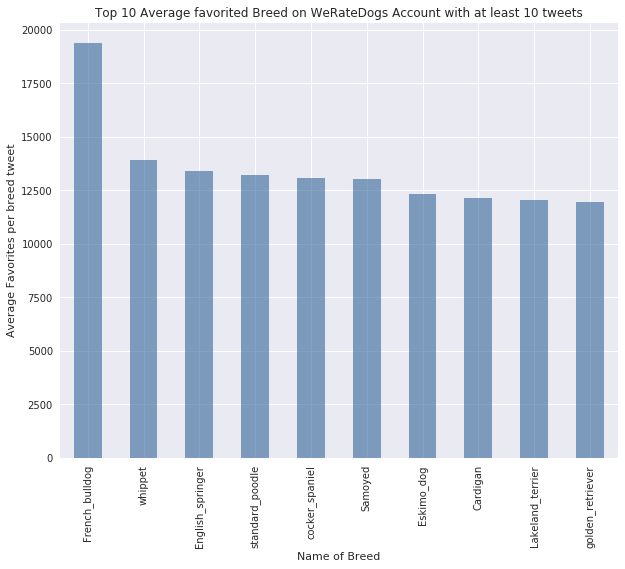

In [207]:
fig_size = plt.figure(figsize=(10,8))
df_fav.sort_values(ascending = False).nlargest(10).plot(kind='bar', color=(0.2, 0.4, 0.6, 0.6))
plt.title('Top 10 Average favorited Breed on WeRateDogs Account with at least 10 tweets')
plt.xlabel('Name of Breed')
plt.ylabel('Average Favorites per breed tweet');

In [208]:
df_ret = round(df_10up.groupby('breed')['retweets'].sum()
            /df_10up.groupby('breed')['retweets'].count(),0).sort_values(ascending=False)

print(df_ret)

breed
standard_poodle                   5139.0
French_bulldog                    5076.0
English_springer                  5037.0
whippet                           4752.0
cocker_spaniel                    4585.0
Eskimo_dog                        4478.0
Samoyed                           4397.0
Great_Pyrenees                    4179.0
Lakeland_terrier                  4068.0
golden_retriever                  3528.0
Labrador_retriever                3526.0
Cardigan                          3514.0
Norwegian_elkhound                3281.0
malamute                          3100.0
Pembroke                          2904.0
Chihuahua                         2708.0
basset                            2697.0
chow                              2585.0
Pomeranian                        2585.0
Chesapeake_Bay_retriever          2518.0
schipperke                        2505.0
German_shepherd                   2478.0
boxer                             2390.0
Blenheim_spaniel                  2390.0
kelpie    

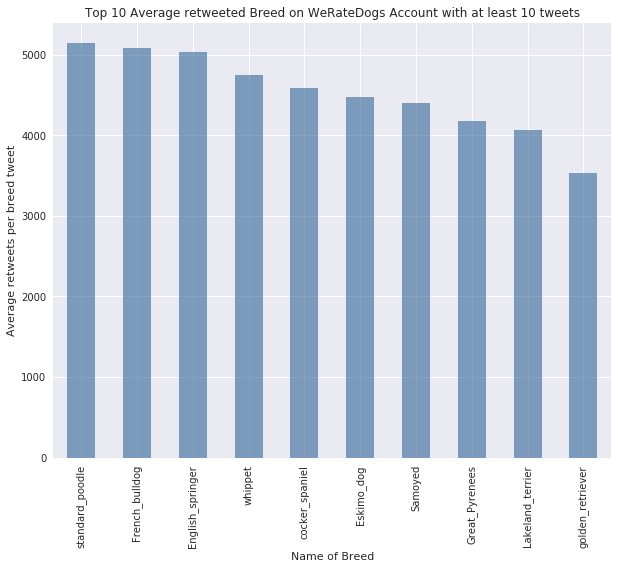

In [209]:
fig_size = plt.figure(figsize=(10,8))
df_ret.sort_values(ascending = False).nlargest(10).plot(kind='bar', color=(0.2, 0.4, 0.6, 0.6))
plt.title('Top 10 Average retweeted Breed on WeRateDogs Account with at least 10 tweets')
plt.xlabel('Name of Breed')
plt.ylabel('Average retweets per breed tweet');

In [210]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1967 entries, 0 to 1966
Data columns (total 15 columns):
tweet_id              1662 non-null float64
timestamp             1662 non-null object
source                1662 non-null object
text                  1662 non-null object
expanded_urls         1662 non-null object
rating_numerator      1662 non-null float64
rating_denominator    1662 non-null float64
name                  1662 non-null object
retweets              1662 non-null float64
favorites             1662 non-null float64
jpg_url               1662 non-null object
img_num               1662 non-null float64
dog_type              1662 non-null object
breed                 1662 non-null object
confidence            1662 non-null float64
dtypes: float64(7), object(8)
memory usage: 230.6+ KB


In [211]:
df_temp = df_clean

In [212]:
df_temp['timestamp'] = pd.to_datetime(df_temp.timestamp)

In [213]:
df_temp.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweets,favorites,jpg_url,img_num,dog_type,breed,confidence
0,6.674053e+17,2015-11-19 18:13:27,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7.0,10.0,Biden,220.0,460.0,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,1.0,None,Saint_Bernard,0.4
1,6.674357e+17,2015-11-19 20:14:03,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12.0,10.0,None,83.0,303.0,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,1.0,None,Rottweiler,1.0
2,NaN,NaT,None,None,None,NaN,NaN,None,NaN,NaN,None,NaN,None,None,NaN
3,NaN,NaT,None,None,None,NaN,NaN,None,NaN,NaN,None,NaN,None,None,NaN
4,6.674530e+17,2015-11-19 21:22:56,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11.0,10.0,Cupcake,89.0,306.0,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,1.0,None,Labrador_retriever,0.8


In [214]:
df_clean['timestamp'] = pd.to_datetime(df_clean.timestamp)

In [215]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1967 entries, 0 to 1966
Data columns (total 15 columns):
tweet_id              1662 non-null float64
timestamp             1662 non-null datetime64[ns]
source                1662 non-null object
text                  1662 non-null object
expanded_urls         1662 non-null object
rating_numerator      1662 non-null float64
rating_denominator    1662 non-null float64
name                  1662 non-null object
retweets              1662 non-null float64
favorites             1662 non-null float64
jpg_url               1662 non-null object
img_num               1662 non-null float64
dog_type              1662 non-null object
breed                 1662 non-null object
confidence            1662 non-null float64
dtypes: datetime64[ns](1), float64(7), object(7)
memory usage: 230.6+ KB


In [216]:
df_temp.groupby(df_temp['timestamp'].dt.year)['source'].value_counts()

timestamp  source            
2015.0     Twitter for iPhone    488
           Twitter Web Client     17
           TweetDeck               2
2016.0     Twitter for iPhone    830
           TweetDeck               6
           Twitter Web Client      3
2017.0     Twitter for iPhone    314
           Twitter Web Client      2
Name: source, dtype: int64

In [217]:
df_clean['retweets'].corr(df_clean['favorites'])

0.93160894575531128

Text(0.5,1,'Relationship between Favorites and Retweets')

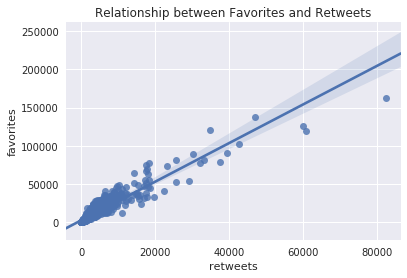

In [218]:
g = sns.regplot(x=df_clean.retweets, y=df_clean.favorites)
fig = g.get_figure()
plt.title('Relationship between Favorites and Retweets')

In [221]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweets,favorites,jpg_url,img_num,dog_type,breed,confidence
0,6.674053e+17,2015-11-19 18:13:27,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7.0,10.0,Biden,220.0,460.0,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,1.0,None,Saint_Bernard,0.4
1,6.674357e+17,2015-11-19 20:14:03,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12.0,10.0,None,83.0,303.0,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,1.0,None,Rottweiler,1.0
2,NaN,NaT,None,None,None,NaN,NaN,None,NaN,NaN,None,NaN,None,None,NaN
3,NaN,NaT,None,None,None,NaN,NaN,None,NaN,NaN,None,NaN,None,None,NaN
4,6.674530e+17,2015-11-19 21:22:56,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11.0,10.0,Cupcake,89.0,306.0,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,1.0,None,Labrador_retriever,0.8


In [222]:
df_temp = df_clean

In [227]:
df_temp = df_temp.set_index('timestamp')

In [228]:
df_temp.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweets,favorites,jpg_url,img_num,dog_type,breed,confidence
timestamp,,,,,,,,,,,,,,
2015-11-19 18:13:27,6.674053e+17,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7.0,10.0,Biden,220.0,460.0,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,1.0,None,Saint_Bernard,0.4
2015-11-19 20:14:03,6.674357e+17,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12.0,10.0,None,83.0,303.0,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,1.0,None,Rottweiler,1.0
NaT,NaN,None,None,None,NaN,NaN,None,NaN,NaN,None,NaN,None,None,NaN
NaT,NaN,None,None,None,NaN,NaN,None,NaN,NaN,None,NaN,None,None,NaN
2015-11-19 21:22:56,6.674530e+17,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11.0,10.0,Cupcake,89.0,306.0,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,1.0,None,Labrador_retriever,0.8


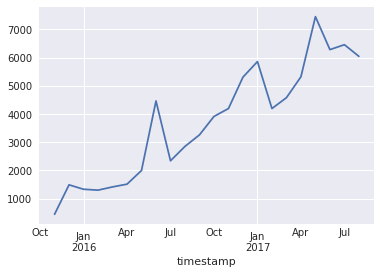

In [229]:
df_temp.groupby(pd.Grouper(freq='M'))['retweets'].mean().plot(kind='line')

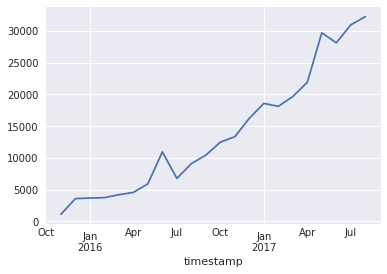

In [230]:
df_temp.groupby(pd.Grouper(freq='M'))['favorites'].mean().plot(kind='line')

In [234]:
df_temp = df_temp.reset_index()

In [235]:
df_temp.loc[df_temp['timestamp'] == '2017-08-01 00:17:27']

,timestamp,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweets,favorites,jpg_url,img_num,dog_type,breed,confidence
156,2017-08-01 00:17:27,8.921774e+17,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,6047.0,32230.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,None,Chihuahua,0.3


In [95]:
df_temp.drop([156], axis=0, inplace=True)

In [96]:
df_temp.loc[df_temp['timestamp'] == '2017-08-01 00:17:27']

,index,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweets,favorites,jpg_url,img_num,dog_type,breed,confidence


In [237]:
#Only tweet in 2017 August, no more tweets beyond this date
df_clean.loc[df_clean['timestamp'] == '2017-08-01 00:17:27']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweets,favorites,jpg_url,img_num,dog_type,breed,confidence
156,8.921774e+17,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,6047.0,32230.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,None,Chihuahua,0.3


In [238]:
df_clean.drop([156], axis = 0, inplace = True)

In [239]:
df_clean.loc[df_clean['timestamp'] == '2017-08-01 00:17:27']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweets,favorites,jpg_url,img_num,dog_type,breed,confidence


In [240]:
df_clean = df_clean.set_index('timestamp')

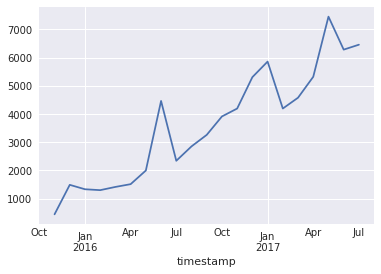

In [244]:
df_clean.groupby(pd.Grouper(freq = 'M'))['retweets'].mean().plot(kind = 'line');

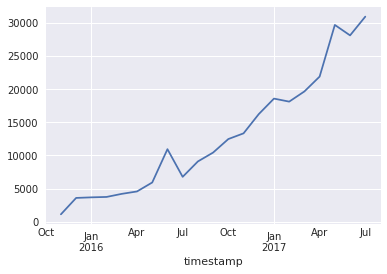

In [245]:
df_clean.groupby(pd.Grouper(freq = 'M'))['favorites'].mean().plot(kind = 'line');

Text(0.5,0,'Date')

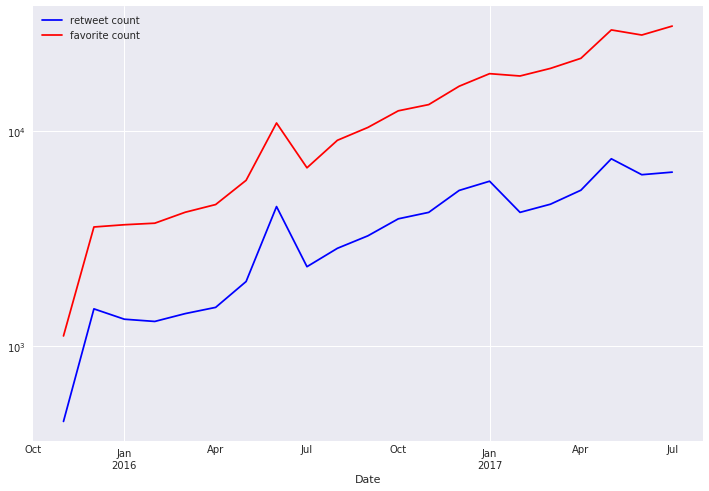

In [257]:
df_clean.groupby(pd.Grouper(freq = 'M'))['retweets'].mean().plot(figsize = (12,8), color = 'blue', label = 'retweet count')
df_clean.groupby(pd.Grouper(freq = 'M'))['favorites'].mean().plot(color = 'red', label = 'favorite count')

plt.yscale('log')
plt.legend()
plt.xlabel('Date')